In [1]:
import os
import torchvision

from torchvision import transforms
from torch.utils.data import DataLoader


ModuleNotFoundError: No module named 'torchvision'

In [2]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [3]:
ls /Users/ybbaek/

Applications/        Google 드라이브/     Public/
Desktop/             Library/             PycharmProjects/
Documents/           Movies/              python/
Downloads/           Music/               rl/
Dropbox/             Pictures/


In [4]:
trimg_fpath  ='/Users/ybbaek/Dropbox/projects/DeepLearning/dataset/dataset_MetalImg/img_metal_training'
tstimg_fpath ='/Users/ybbaek/Dropbox/projects/DeepLearning/dataset/dataset_MetalImg/img_metal_test'


In [5]:
# 참고만, 본 예제에서는 상관 없음
trans = transforms.Compose([
        transforms.Resize((64,128))
])

In [6]:
train_data = torchvision.datasets.ImageFolder(root=trimg_fpath, 
                                              transform=None)

test_data = torchvision.datasets.ImageFolder(root=tstimg_fpath, 
                                              transform=None)


In [7]:
train_data[0][0]
# result > <PIL.Image.Image image mode=RGB size=28x28 at 0x12ADD9978>,

0 <PIL.Image.Image image mode=RGB size=28x28 at 0x11FFD3898> 0
1 <PIL.Image.Image image mode=RGB size=28x28 at 0x1200455F8> 0
2 <PIL.Image.Image image mode=RGB size=28x28 at 0x120045940> 0


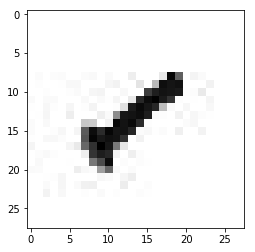

In [8]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    imshow(data)
    if num==2:
        break

In [9]:
data

In [10]:
train_data.__getitem__(0)[0]

In [11]:
train_data.__len__()

2100

In [12]:
test_data[0][0]

In [13]:
pwd

'/Users/ybbaek/Dropbox/projects/DeepLearning/ML/sample/Pytorch'

In [14]:
tmp_path='/Users/ybbaek/Dropbox/projects/DeepLearning/ML/sample/Pytorch/data'


In [15]:
tmp_path2 = tmp_path +'/%d_%d.jpeg'
tmp_path2

'/Users/ybbaek/Dropbox/projects/DeepLearning/ML/sample/Pytorch/data/%d_%d.jpeg'

In [16]:
data.save(tmp_path2 %(num, label))


In [17]:
len(train_data)

2100

# - Metal image test

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [19]:
import visdom

vis = visdom.Visdom()
vis.close(env='main')

''

In [20]:
def loss_tracker(loss_plot, loss_val, num):
    vis.line(X=num,
            Y=loss_val,
            win= loss_plot,
            update='append')

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [22]:
trans = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.ImageFolder(root=trimg_fpath, 
                                              transform=trans)

In [23]:
train_data[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]), 0)

In [24]:
vis.images(train_data[1][0], env='main')

'window_378d38b7011774'

In [25]:
for i in range(7):
    #print(i)
    vis.images(train_data[i*300][0], env='main')

In [26]:
data_loader = DataLoader(dataset=train_data, 
                         batch_size=8,
                         shuffle=True,
                        num_workers=2)

In [27]:
len(data_loader)

263

In [28]:
data_loader

In [29]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,3,padding=1), #input, output, filter size
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(7*7*16, 120),
            nn.ReLU(),
            nn.Linear(120,7)
        )
        
    def forward(self, x):
        out = self.layer1(x)
        #print(out.shape) #size check
        out = self.layer2(out)
        #print(out.shape) #size check
        out = out.view(out.shape[0], -1)
        #print(out.shape) #size check
        out = self.layer3(out)
        #print(out.shape)
        return out
        

In [30]:
#testing
net = CNN().to(device)
test_input = (torch.Tensor(3,3,28,28).to(device))
test_out = net(test_input)

In [31]:
optimizer = optim.Adam(net.parameters(), lr=0.00005)
loss_func = nn.CrossEntropyLoss().to(device)

In [32]:
total_batch = len(data_loader)
total_batch

263

In [33]:
# √ç≈˜µ≤Ωåß©˚˙¬…æ…œ∑´øπΩ≈˜µ≤≥ç√

In [34]:
loss_plt = vis.line(Y=torch.Tensor(1).zero_(),
                    opts=dict(title='loss_tracker',
                    legend=['loss'],
                    showlegend=True))

In [35]:
epochs = 50
for epoch in range(epochs):
    avg_cost = 0.0
    for num, data in enumerate(data_loader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss/ total_batch
    
    print('[Epoch:{}] cost= {}'.format(epoch+1, avg_cost))
    loss_tracker(loss_plt, torch.Tensor([avg_cost]), torch.Tensor([epoch]))

print('learning finist')


[Epoch:1] cost= 1.937699317932129
[Epoch:2] cost= 1.8894773721694946
[Epoch:3] cost= 1.7849081754684448
[Epoch:4] cost= 1.606821060180664
[Epoch:5] cost= 1.366347074508667
[Epoch:6] cost= 1.119624376296997
[Epoch:7] cost= 0.9016987085342407
[Epoch:8] cost= 0.7198505997657776
[Epoch:9] cost= 0.5769542455673218
[Epoch:10] cost= 0.4613485038280487
[Epoch:11] cost= 0.3690990209579468
[Epoch:12] cost= 0.2961406707763672
[Epoch:13] cost= 0.2387823909521103
[Epoch:14] cost= 0.19289307296276093
[Epoch:15] cost= 0.15910452604293823
[Epoch:16] cost= 0.12970136106014252
[Epoch:17] cost= 0.10603946447372437
[Epoch:18] cost= 0.08897626399993896
[Epoch:19] cost= 0.07349967956542969
[Epoch:20] cost= 0.06144481152296066
[Epoch:21] cost= 0.052316196262836456
[Epoch:22] cost= 0.042852506041526794
[Epoch:23] cost= 0.03670830652117729
[Epoch:24] cost= 0.031258903443813324
[Epoch:25] cost= 0.027218254283070564
[Epoch:26] cost= 0.023693304508924484
[Epoch:27] cost= 0.019786827266216278
[Epoch:28] cost= 0.01

In [208]:
len(data[0][0][0])


28

In [213]:
data[0][0][0][0], data[0][1][0][0]

(tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         0.9725, 0.9647, 1.0000, 1.0000, 1.0000, 0.9882, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         0.9333, 1.0000, 1.0000, 0.9961, 0.9765, 1.0000, 0.9765, 0.9922, 0.9922,
         1.0000, 1.0000, 0.9882, 0.9686, 0.9843, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000]))

In [222]:
len(label)

420

In [279]:
torch.save(net.state_dict(), './model/model.pth')

In [280]:
new_net = CNN().to(device)

In [281]:
new_net.load_state_dict(torch.load('./model/model.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [282]:
print(net.layer1[0])
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]


Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
tensor([-0.0859,  0.1286,  0.1289], grad_fn=<SelectBackward>)
tensor([-0.0859,  0.1286,  0.1289], grad_fn=<SelectBackward>)


tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=torch.uint8)

In [45]:
trans = torchvision.transforms.Compose([
#    transforms.Resize((64,128))
    transforms.ToTensor()
])

test_data = torchvision.datasets.ImageFolder(root=tstimg_fpath,
                                            transform=trans)

In [46]:
test_set = DataLoader(dataset=test_data, batch_size=len(test_data))

In [47]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction,1) == label
        
        accuracy = correct_prediction.float().mean()
        print('accuracy:',accuracy.item())

accuracy: 1.0


In [234]:
imgs.shape

torch.Size([420, 3, 28, 28])

In [236]:
label.shape

torch.Size([420])